In [2]:
import cv2
from matplotlib import pyplot as plt
import os

import numpy as np


In [26]:
path_imgs = "imgs"
path_labels = "imgs/labels"

clean_img_name = "1660021200.jpg"

# Get all the names of the images
imgs = os.listdir(path_imgs) # List of all the images in the folder

labels = os.listdir(path_labels) # List of all the labels in the folder

# Sort the lists
imgs.sort()
labels.sort()

if ".DS_Store" in imgs:
    imgs.pop(imgs.index(".DS_Store"))

if ".DS_Store" in labels:
    labels.pop(labels.index(".DS_Store"))

# print(labels)
# Read the labels
imgs_with_labels = {}
for label_name in labels:
    with open(path_labels + "/" + label_name, "r") as f:
        img_name = label_name[:-4] + ".jpg"
        imgs_with_labels[img_name] = []
        for line in f:
            line = line.strip().split(",")
            label_name = line[0]
            label_x = line[1]
            label_y = line[2]
            img_name = line[3]

            if img_name not in imgs:
                continue

            label = {
                "label_name": label_name,
                "label_x": int(label_x),
                "label_y": int(label_y)
            }

            if img_name in imgs_with_labels:
                imgs_with_labels[img_name].append(label)
            # else:
            #     imgs_with_labels[img_name] = [label]

Now, we have all the images with their respective csv with the labels. We will plot a grid of the 10 images to see the different images with their respective labels.

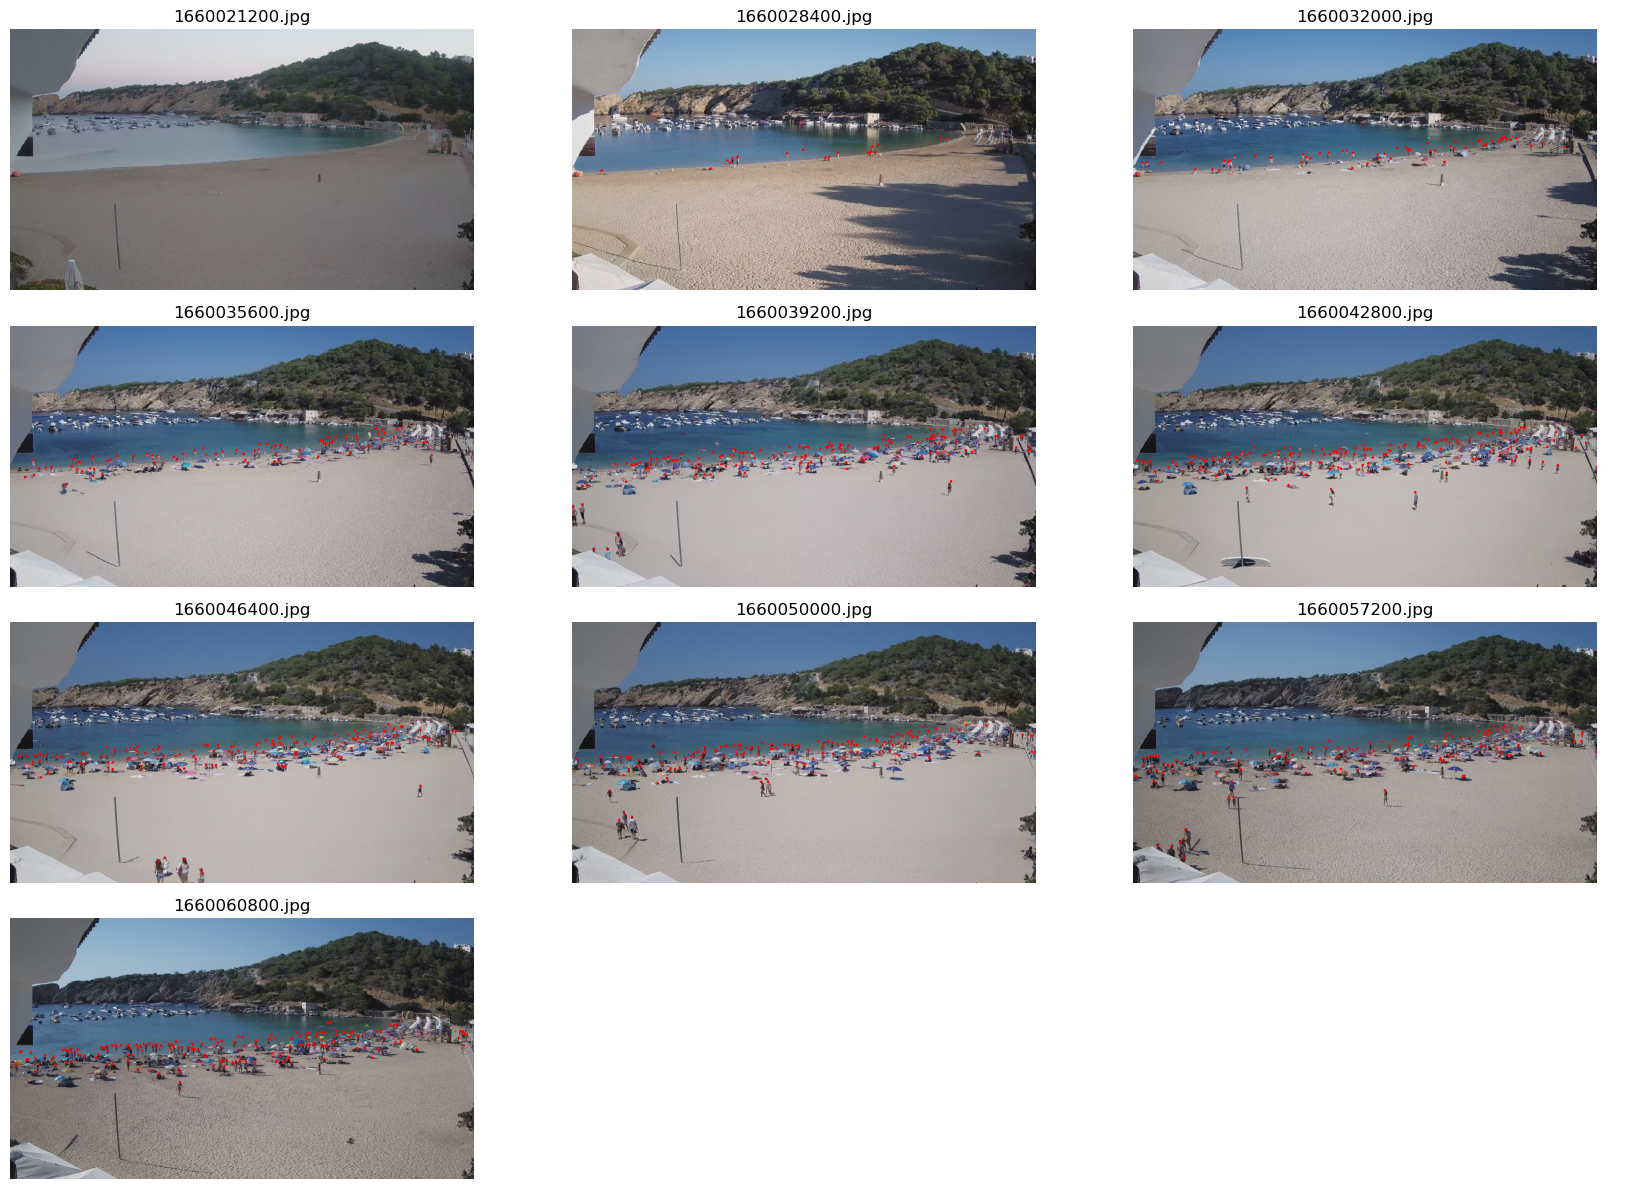

In [45]:
rows, cols = 4, 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, cols, figsize=(17, 12))
axes = axes.flatten()

for idx, (img_name, img_labels) in enumerate(imgs_with_labels.items()):
    if img_name not in imgs:
        continue

    img = cv2.imread(os.path.join(path_imgs, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for label in img_labels:
        x, y = label["label_x"], label["label_y"]
        cv2.circle(img, (x, y), 5, (255, 0, 0), -1)
    
    axes[idx].set_title(img_name)
    axes[idx].imshow(img)
    axes[idx].axis("off")

for j in range(len(imgs_with_labels), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()